<a href="https://colab.research.google.com/github/johanhoffman/DD2363-VT19/blob/bozzato/Lab-7/bozzato_lab7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab 7: Optimization and learning**
**Bozzato Federico**

#Abstract

Short summary of the lab report. State the objectives, methods used, main results and conlusions. 

#About the code

A short statement on who is the author of the file, and if the code is distributed under a certain license. 

In [40]:
"""This program is a template for lab reports in the course"""
"""DD2363 Methods in Scientific Computing, """
"""KTH Royal Institute of Technology, Stockholm, Sweden."""

# Copyright (C) 2019 Johan Hoffman (jhoffman@kth.se)

# This file is part of the course DD2363 Methods in Scientific Computing
# KTH Royal Institute of Technology, Stockholm, Sweden
#
# This is free software: you can redistribute it and/or modify
# it under the terms of the GNU Lesser General Public License as published by
# the Free Software Foundation, either version 3 of the License, or
# (at your option) any later version.

# This template is maintained by Johan Hoffman
# Please report problems to jhoffman@kth.se

'KTH Royal Institute of Technology, Stockholm, Sweden.'

#Set up environment

To have access to the neccessary modules you have to run this cell. If you need additional modules, this is where you add them. 

In [0]:
# Load neccessary modules.
from google.colab import files

import time

import numpy as np
from numpy import linalg as la

from matplotlib import pyplot as plt

#Introduction

Give a short description of the problem investigated in the report, and provide some background information so that the reader can understand the context. 

Briefly describe what method you have chosen to solve the problem, and justify why you selected that method. 

Here you can express mathematics through Latex syntax, and use hyperlinks for references.

[Hyperlink to DD2363 course website.](https://kth.instructure.com/courses/7500)

$
{\displaystyle \frac{\partial u}{\partial t}} + u\cdot \nabla u +\nabla p = f, \quad \nabla \cdot u=0$



#Useful tools

In [0]:
def derivative(fun, point, h=0.01):
  '''
  Calculates the first order derivative of the function @fun at the point
  @point.
  Parameters:
  - fun: function for which the 1st order derivative is wanted
  - point: point where to calculate the derivative
  Output:
  - derivative: central 1st order derivative
  '''
  return (fun(point+h) - fun(point-h)) / (2*h)              


################################################################################


def jacobian(fun,point,h=0.01):
  '''
  Calculates the Jacobian matrix for the vector function @fun at the point
  @point.
  Parameters:
  - fun: function for which the Jacobian matrix is wanted
  - point: point where to calculate the Jacobian
  - h (default= 1): incrementation for the derivative
  Output:
  - jacobian: jacobian matrix of the function @fun
  '''
  if not isinstance(point, np.ndarray):
    point = np.array(point)

  n= len(point)

  jacobian= np.zeros((n,n))
  for i in range(0,n):
    pp1= [p for p in point]
    pp2= [p for p in point]

    pp1[i]= pp1[i] + h
    pp2[i]= pp2[i] - h

    jacobian[:,i]= ((fun(pp1) - fun(pp2)) / (2*h)).T

  return jacobian


################################################################################


def newtonScalarNLeq(fun, point, der=None, h= 0.1, tol= 1e-5):
  '''
  Solve the scalar nonlinear equation f(x) = 0, where f(x) is the function @fun.
  The method used is Newton's method.
  Parameters:
  - fun: function 
  - point: starting guess for the iteration
  - der (default = None): derivative of the function @fun, calculated manually. 
  - h (default = 0.1): dx used in computing the derivative
  - tol (default= 1e-5): tolerance to stop the iterations
  Output:
  - x: point x such that f(x)=0
  - residuals: vector containing all the residuals for each iteration
  - iter: number of iterations for reaching the convergence
  '''
  
  
  if not callable(fun):
    print('Error: impossible to continue! Parameter @fun is not callable()')
    return None, None
    
  # loop until convergence is not reached
  residuals= []
  x= point
  res= np.absolute(fun(x))
  residuals.append(res)
  k= 1
  while res >= tol and k < 1000:
    alpha = 0
    if callable(der):
      alpha= der(x)
    else:
      alpha= derivative(fun, x, h)
      
    x= x - fun(x)/alpha
    res= np.absolute(fun(x))
    residuals.append(res)
    k+= 1
    
  return x, np.array(residuals), k


################################################################################


def newtonNLsystems(fun, initialPoint, J= None, h=0.1, tol= 1e-5):
  '''
  Solve the vector nonlinear system of equations f(x) = 0, where f(x) is the
  vector function @fun.
  The method used is Newton's method.
  Parameters:
  - fun: vector function 
  - point: starting guess for the iteration
  - J (default= None): the Jacobian matrix of the vector function. It improves
    algorithm performances.
    - h (default = 0.1): dx used in computing the derivative
  - tol (default= 1e-5): tolerance to stop the iterations
  Output:
  - x: point x such that f(x)=0
  - residuals: vector containing all the residuals for each iteration
  - iter: number of iterations for reaching the convergence
  '''
  if not callable(fun):
    print('Error: impossible to continue! Parameter @fun is not callable()')
    return None, None
  
  if not isinstance(initialPoint, np.ndarray):
    intialPoint = np.array(initialPoint)
    
  x= initialPoint
  k = 1
  residuals= []
  res= la.norm(fun(x))
  
  residuals.append(res)
  while res >= tol and k < 1000:                                      # res= |f(x)|
    jac= []
    if callable(J):                                      # use J given by the user
      jac= J(x)                                          # or calculate it
    else:
      jac= jacobian(fun,x,h)
    

    b= - fun(x)
    dx, _, _, _ = la.lstsq(jac, b, rcond=None)       # built-in function
    x = x + dx
    res= la.norm(fun(x))
    residuals.append(res)
    k+= 1
    
  return x, np.array(residuals), k

#Methods

Describe the methods you used to solve the problem. This may be a combination of text, mathematical formulas (Latex), algorithms (code), data and output.  

##Mandatory assignment

###1. Gradient descent method in $R^n$

In [0]:
def minFinding(fun, x0, tol= 1e-3):
  
  def alphaFinding(fun, x, grad, beta, tol):
    #print('x=', x)
    #print('fun(x)=', fun(x))
    f= lambda y: fun(y) - beta*(fun(x)) + 1
    
    start= (np.zeros_like(x))
    y= solver(f, start, tol= tol)[0]
    
    alpha= (x - y) / grad
    
    #print(' > f(y) = {}, y = {}, alpha = {}'.format(beta*fun(x),y,alpha))
    
    return alpha

  
  if not isinstance(x0, np.ndarray):
    x0= np.array(x0)
    
  if x0.shape == () or x0.shape[0] == 1:                   # choosing the right
    der= derivative                                        # function based on 
    solver= newtonScalarNLeq
  else:                                                    # the dimension of the
    der= jacobian                                          # starting point
    solver= newtonNLsystems
  
  print(solver)
  k= 0
  x= x0
  step= der(fun,x)
  
  residuals= []
  residuals.append(la.norm(step))
  
  while residuals[k] >= tol and k < 1000:
    #print('{} iteration'.format(k+1))
    alpha= alphaFinding(fun, x, step, 0.5, tol)
    x= x - alpha*step
    #print(' > x = {}'.format(x))
    
    step= der(fun,x)
    residuals.append(la.norm(step))
    k+= 1
    
  print('Convergence after {} iterations'.format(k))
  return x, np.array(residuals)

##Extra assignment

###2. Newton's method in $R^n$

###3. Augmented Lagrangian method in $R^n$

#Results

##1. Gradient descent method in $R^n$

<function newtonScalarNLeq at 0x7f0006988048>
Convergence after 426 iterations
-0.5012444441889601


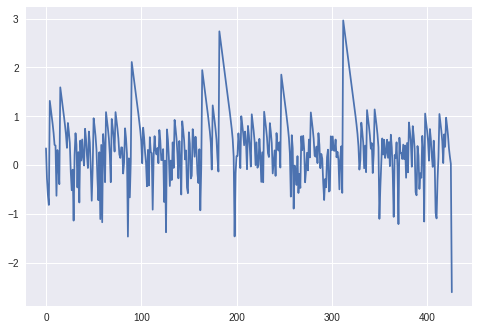

0.0024888883779203286


In [90]:
f= lambda x: x**2 + x
x0= 0.6
x, res= minFinding(f, x0, tol= 1e-2)

print(x)
plt.figure()
plt.plot([x for x in range(0,res.shape[0])], np.log10(res))
plt.show()

print(res[-1])

################################################################################



In [91]:
# TODO: da sistemare

f= lambda x: x[0]**2 + x[1]**2
x0= [0.6,0.1]
x, res= minFinding(f, x0, tol= 1e-2)

print(x)
plt.figure()
plt.plot([x for x in range(0,res.shape[0])], np.log10(res))
plt.show()

print(res[-1])

<function newtonNLsystems at 0x7f0006c01620>
[0. 0.]


LinAlgError: ignored

##2. Newton's method in $R^n$

##3. Augmented Lagrangian method in $R^n$

#Discussion

Summarize your results and your conclusions. Were the results expected or surprising. Do your results have implications outside the particular problem investigated in this report? 